#      <font color=lightgreen> Adult Income Prediction
    
    
Adult Income data set was studied. The data set description is as follows.


<font color=blue>i. Categorical Variables
    

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. Individual work category

Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest education degree

Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status

Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. Individual's occupation

Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family

Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

Gender: Female, Male.

Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Individual's native country


<font color=darkblue>ii.Continuous Variables


Age: continuous. Age of an individual

Fnlwgt: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

Capital-gain: continuous.

Capital-loss: continuous.

Hours-per-week: continuous.

Individual's working hour per week


<font color=green>Please note the format of sep = (whether the seperator is a semicolon or a comma).


In [1]:

import pandas as pd
df = pd.read_csv('../input/adult-income/adult11.csv', sep=',')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<font color=blue> I firstly add column names.


In [2]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
              'occupation', 'relationship','race', 'gender', 'capital-gain', 'capital-loss', 
              'hours-per-week', 'native-country', 'salary']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<font color=blue> Importing libraries. </font> 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

<font color=blue> Checking whether my data set include null data or not. </font> 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
gender            48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
salary            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


 <font color=magenta> As we see above,there are 48.842 and no 'non-null' data.   

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

[](http://) <font color=magenta> 
Examining the correlations

In [6]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


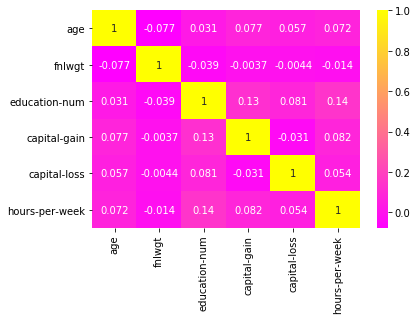

In [7]:
ax=sns.heatmap(df.corr(),annot=True, cmap="spring")
bottom, top = ax.get_ylim()

0.8-1.0 Very high corelation

0.6-0.8 High corelation

0.4-0.6 Moderate corelation

0.2-0.4 Weak corelation

<font color=magenta>0.0-0.2 
Too weak or no correlation. The highest correlation was observed between education number and hours per week. (0.14)

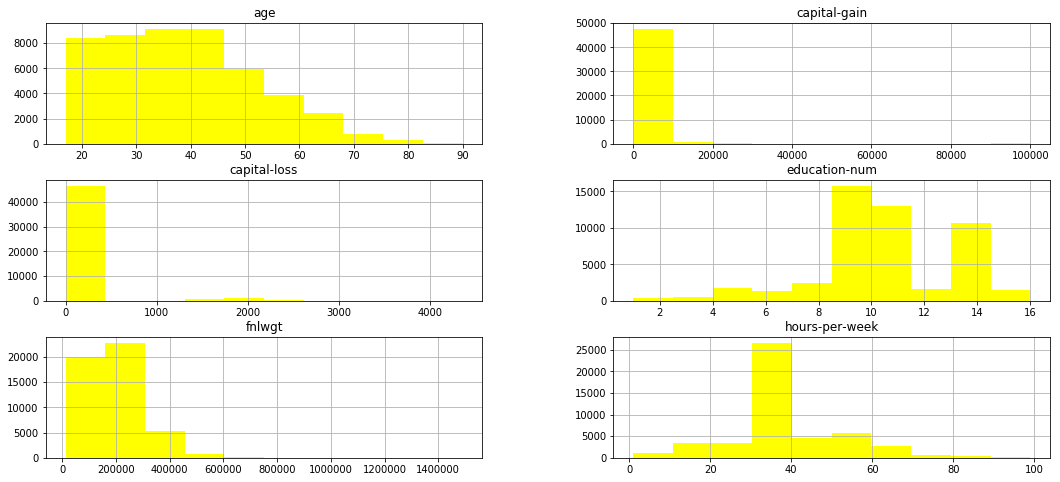

In [8]:
#Let's have a look at histograms.
df.hist(figsize=(18,8), color = "yellow")
plt.show()

<font color=magenta>The distribution of Hours-per-week data was observed to be close to normal. Since the age variable is skewed to the right, education_num is skewed to the left, and the rate of capital_gain and capital_loss is 0, a structure gathered on the left stands out. The hour_per_week variable appears to have a bell curve shape that tends to the left but is closer to the relative normal distribution compared to other variables.

## <font color=yellow>Examining categorical variables:
    
 <font color=magenta>   
Since the target variable is salary, its distribution was viewed with the value_counts () function and visualized with the seaborn library. 

1. We determine the width and length of the image with plt.figure ().
2. We write the variable we want to visualize to the sns.countplot () function.
3. We find the distribution of the target variable with the value_counts () function.

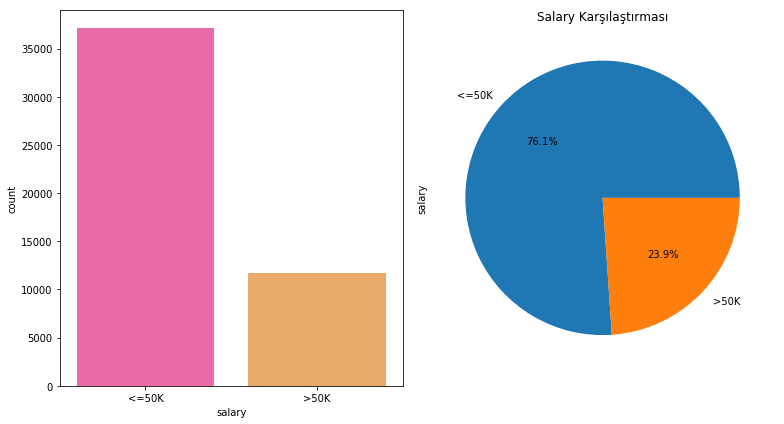

In [9]:
fig,axarr = plt.subplots(nrows=1,ncols=2,figsize=(11,6))
sns.countplot(x="salary", data=df, palette='spring',ax=axarr[0])
df.salary.value_counts().plot.pie(autopct ="%1.1f%%",ax=axarr[1])
plt.title('Salary Karşılaştırması')
plt.tight_layout()
plt.show()

<font color=magenta>We see that those with low annual income are 3/4 of the entire data set.

<font color=magenta>The distribution of educational status of the people in the data set:

In addition to the image above, since we want to sort our variables on the x axis from large to small, we determine the order and rotate the values ​​70 degrees so that our x axis does not nest.

1. With plt.figure () we determine the width and length of the image.
2. We write the variable we want to visualize to the sns.countplot () function and sort the target variable from large to small.
3. We rotate the x-axis 70 degrees so that the values ​​do not mix.
4. We find the distribution of the target variable with the value_counts () function.

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

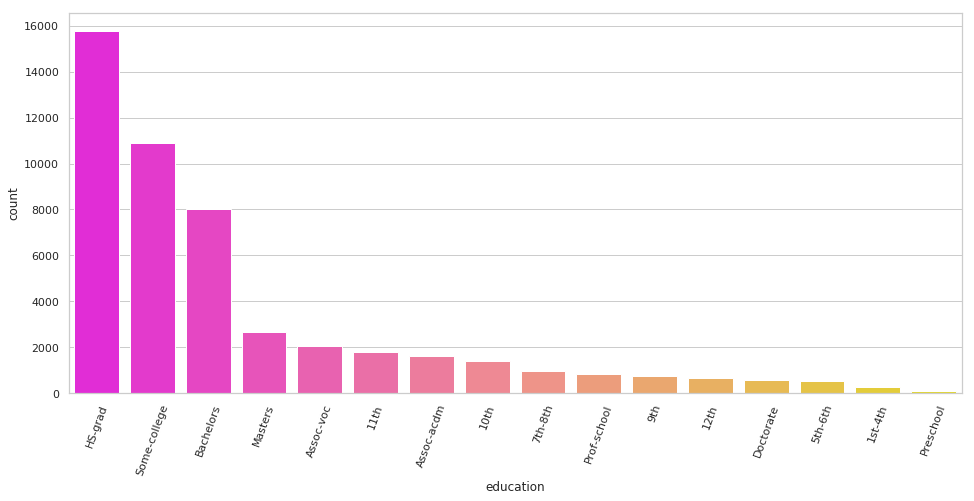

In [10]:
plt.figure(figsize=(16,7))
sns.set(style="whitegrid")
sns.countplot(df['education'], order = df['education'].value_counts().index, palette='spring')
plt.xticks(rotation=70)
df['education'].value_counts()

<font color=magenta> We see that high school, some-college and bachelor deegrees are in the majority.

<font color=magenta>
Group and distribution of people who receive weekly average working hours of less than 50K and more, depending on their educational status: 
    
Here, I use barplot because my variables are categorical.


1. With plt.figure () we determine the width and length of the image.
2. We write the x and y values ​​of the variable we want to visualize in the sns.barplot () function.
3. By hue = 'salary' option, we divide the data into two according to the column of 'salary'.
4. We visualize with palette = 'spring' instead of the default color option.
5. We rotate the x-axis 70 degrees so that the values ​​do not mix.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

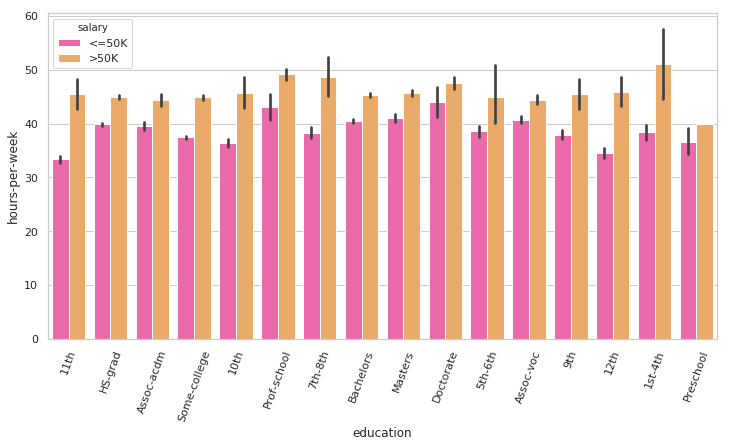

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x="education", y="hours-per-week", data=df, hue="salary", palette='spring')
plt.xticks(rotation=70)

<font color=magenta>
We see the highest weekly working hours in those who have graduated from professors and doctorates. Those with more than 50 K income have always worked harder.
<font color=magenta>
Group by gender and examine average weekly working hours of people: 

1. With plt.figure (), we determine the width and length of the image.
2. We write the x and y values ​​of the variable we want to visualize in the sns.pointplot () function.
3. With hue = 'sex' option, we divide the data into two according to the sex 'column.
4. We visualize with palette = 'dark' instead of the default color option.
5. We rotate the x-axis 70 degrees so that the values ​​do not mix.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

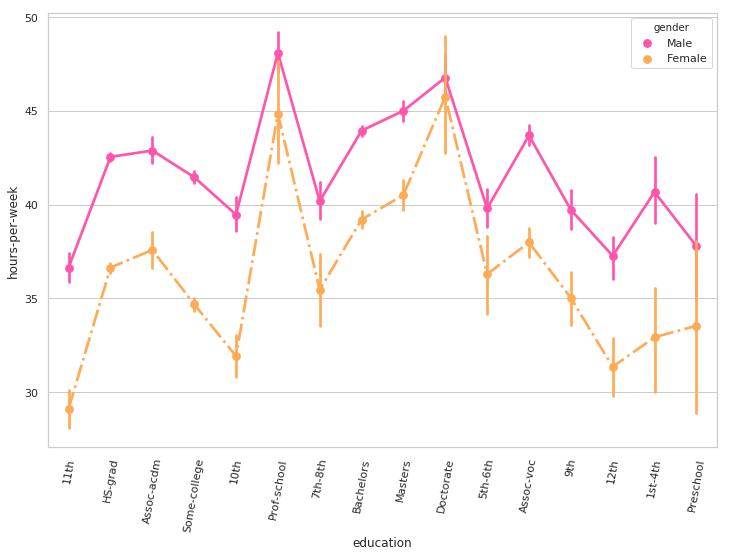

In [12]:
plt.figure(figsize=(12,8))
sns.pointplot(x="education", y="hours-per-week", hue='gender', palette="spring", linestyles=["-", "-."], data=df)
plt.xticks(rotation=80)

<font color=magenta>We see that the weekly working hours of men are generally higher, except for women who have made a doctorate.



## <font color=yellow> Editing Pre-Model Variables and EDA


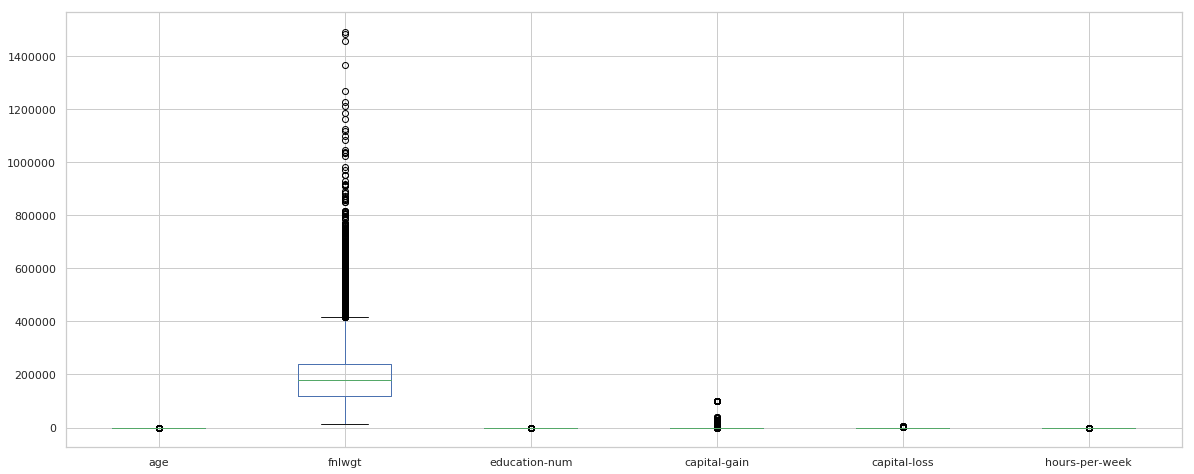

In [13]:
df.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (20,8))

<font color=magenta>I understand that Final Weight has contradictory observations on the Box plot, I exclude it from my dataset as I think it will not add much meaningful value to my forecast.

In [14]:
df=df.drop("fnlwgt",axis=1)

<font color=magenta>
I create it separately for contradictory observations.

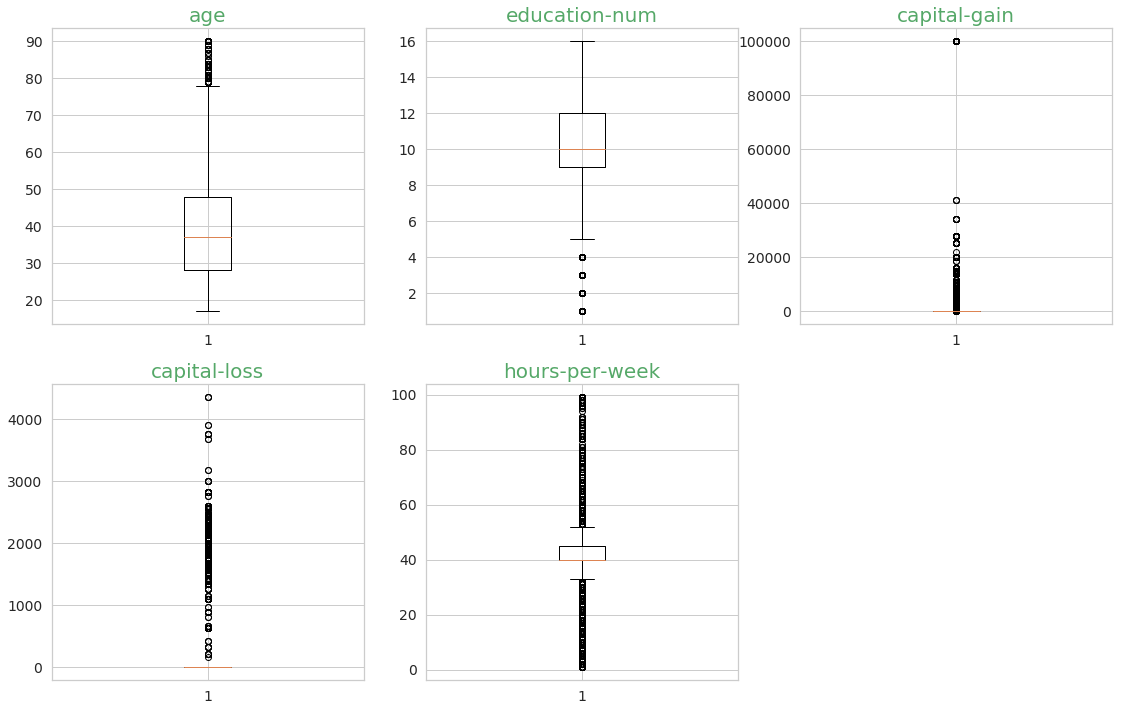

In [15]:
plt.figure(figsize=(19,12))
num_feat = df.select_dtypes(include=['int64']).columns
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_feat[i]])
    plt.title(num_feat[i],color="g",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
plt.show()

In [16]:
#I wanted to look at the data against Capital Gain.
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<font color=magenta> Education and education_num may mean the same thing, let's check.

In [17]:
df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


<font color=magenta> It turned out as I thought, we are deleting the education column.

In [18]:
df.drop(columns=['education'], inplace=True)

<font color=magenta> I categorized all marital status details as married and single.

In [19]:
df['marital-status'] = df['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')

df.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


<font color=magenta> Since the target variable in our model is 'salary', we separate it from the rest of the data set.

I'm looking at the data of type object.


In [20]:
X = df.drop(['salary'], axis=1)
y = df['salary']
X.select_dtypes(include='object').tail(20)

,workclass,marital-status,occupation,relationship,race,gender,native-country
48822,?,Separated,?,Not-in-family,Black,Female,United-States
48823,?,Married-civ-spouse,?,Husband,White,Male,United-States
48824,Local-gov,Divorced,Prof-specialty,Unmarried,White,Female,United-States
48825,Private,Divorced,Other-service,Not-in-family,Other,Female,United-States
48826,Local-gov,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States
48827,Private,Divorced,Tech-support,Not-in-family,White,Female,United-States
48828,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Mexico
48829,Self-emp-not-inc,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
48830,State-gov,Divorced,Adm-clerical,Other-relative,White,Female,United-States
48831,Self-emp-not-inc,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


<font color=magenta> 
Although some data do not appear to be missing, '?' filled with question mark. I have completed this missing data.

1. Columns with data type 'object' are selected.
2. These columns are filled with the mode () value of that column.

In [21]:
categorical_columns = [c for c in X.columns  if X[c].dtype.name == 'object']
for c in categorical_columns:
  X[c] = np.where(X[c] == ' ?', X[c].mode(), df[c])
X.select_dtypes(include='object').tail(20)

,workclass,marital-status,occupation,relationship,race,gender,native-country
48822,?,Separated,?,Not-in-family,Black,Female,United-States
48823,?,Married-civ-spouse,?,Husband,White,Male,United-States
48824,Local-gov,Divorced,Prof-specialty,Unmarried,White,Female,United-States
48825,Private,Divorced,Other-service,Not-in-family,Other,Female,United-States
48826,Local-gov,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States
48827,Private,Divorced,Tech-support,Not-in-family,White,Female,United-States
48828,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Mexico
48829,Self-emp-not-inc,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
48830,State-gov,Divorced,Adm-clerical,Other-relative,White,Female,United-States
48831,Self-emp-not-inc,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


<font color=magenta> Separating 'Object' type variables into 0 and 1 using one-hot-encoding method:

In [22]:
X = pd.concat([X, pd.get_dummies(X.select_dtypes(include='object'))], axis=1)
X = X.drop(['workclass', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'], axis=1)
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,30,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# <font color=yellow> 
Setting up the model & applying standard modeling processes:

## <font color=lightgreen> 1. Decission Tree Classifier

<font color=magenta> Train the model and make predictions on test data


1. Separating the data into training and test sub-data groups.
2. Creating a decision tree model.
3. 'Fit' the model to the training data.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
d_tree1 = DecisionTreeClassifier(max_depth = 3, random_state=42)
d_tree1.fit(X_train, y_train)
print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (34189, 91)
Test data set size :  (14653, 91)


<font color=magenta>4. Giving the test data to the model and predicting it.
    
<font color=magenta>5. Finding a confusion matrix based on the similarity between real value and estimate.

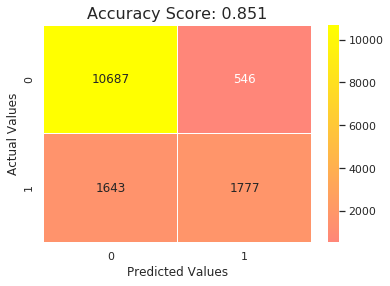

In [24]:
predictions = d_tree1.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
ax=sns.heatmap(cm1, annot=True, fmt=".0f", center=0, cmap="spring", linewidths="0.5"  )
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 16)
plt.show()

<font color=magenta>6. See classification success metrics.

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['50Kdan düşük', '50Kdan yüksek']))

               precision    recall  f1-score   support

 50Kdan düşük       0.87      0.95      0.91     11233
50Kdan yüksek       0.76      0.52      0.62      3420

     accuracy                           0.85     14653
    macro avg       0.82      0.74      0.76     14653
 weighted avg       0.84      0.85      0.84     14653



<font color=magenta>7. 
Visualizing the decision tree (Here my code is working but there is a library problem about importing, I recommend you to try it on your own notebook, that's why i did not delete it.)

In [26]:
from sklearn.tree import export_graphviz
# resim göstermesi için
from IPython.display import Image
# bu çıktıyı yazdırmak yerine string olarak kaydetmek için 
from sklearn.externals.six import StringIO
# burasının konuyla alakası yok, çıktı için bir nesne yaratılıyor
dt_data =StringIO()
# ağacı dışarıya aktarıyoruz
export_graphviz(d_tree1, out_file=dt_data,filled=True,rounded=True,impurity=False,
               feature_names=X.columns, class_names=['<=50K','>50K'])
# pydotplus kütüphanesini çağıralım ve grafik yaratalım
import pydotplus
graph = pydotplus.graph_from_dot_data(dt_data.getvalue())
# bu grafiği gösterelim
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

<font color=magenta>8. Visualization of the attribute importance order made while the classification model is being established.

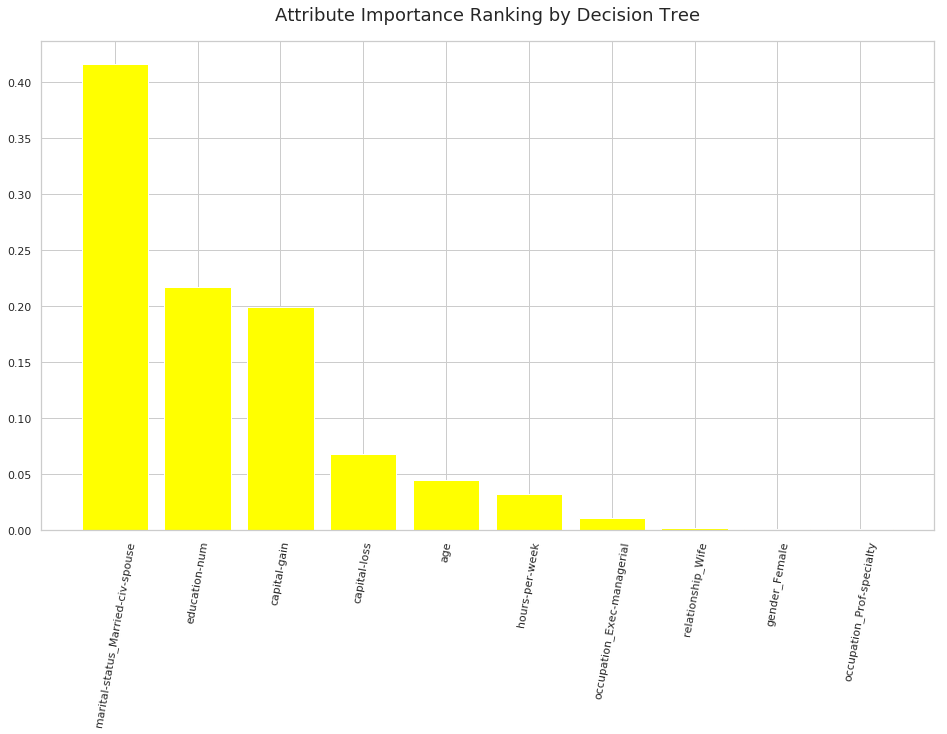

In [27]:
plt.figure(figsize=(16, 9))

from sklearn import ensemble

d_tree2 = DecisionTreeClassifier(max_depth = 8, random_state=42)
d_tree2.fit(X_train, y_train)
ranking = d_tree2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Attribute Importance Ranking by Decision Tree", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="yellow", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

## <font color=yellow>2.Logistic Regression

<font color=magenta>Setting up the model, applying standard modeling processes:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
lr = LogisticRegression(solver='liblinear',random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

4. To give the test data to the model and predict it.
5. Finding the confusion matrix according to the similarity between the real value and the estimate.

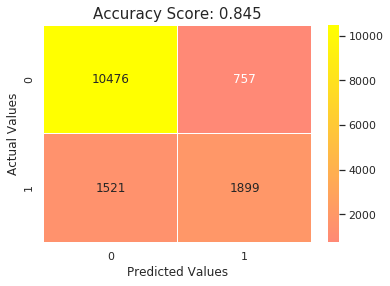

In [29]:
predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
ax=sns.heatmap(cm1, annot=True, fmt=".0f", center=0, cmap="spring", linewidths="0.5")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

<font color=magenta>6. Finding precision, recall, f1-score values.

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     11233
        >50K       0.71      0.56      0.63      3420

    accuracy                           0.84     14653
   macro avg       0.79      0.74      0.76     14653
weighted avg       0.84      0.84      0.84     14653



## <font color=yellow>3.Gradient Boosting Classifier

<font color=magenta> Setting up the model, applying standard modeling processes:

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(loss='exponential',learning_rate=0.01,n_estimators=200)
GB.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='exponential', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

<font color=magenta>4. To give the test data to the model and predict it.
<font color=magenta>5. Finding the confusion matrix according to the similarity between the real value and the estimate.

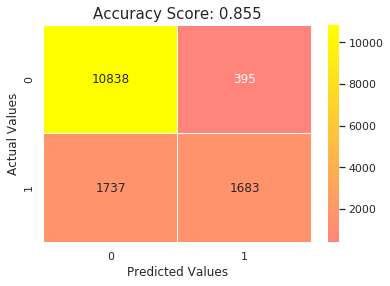

In [32]:
predictions = GB.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
ax=sns.heatmap(cm1, annot=True, fmt=".0f", center=0, cmap="spring", linewidths="0.5")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

<font color=magenta>6. Finding Precision, recall, f1-score values.

In [33]:
y_pred = GB.predict(X_test)
print('Classification Report:')
print('\n')
print(classification_report(y_test,y_pred))

Classification Report:


              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91     11233
        >50K       0.81      0.49      0.61      3420

    accuracy                           0.85     14653
   macro avg       0.84      0.73      0.76     14653
weighted avg       0.85      0.85      0.84     14653



## <font color=yellow>4.XGBoost Classifier

<font color=magenta> Setting up the model, applying standard modeling processes:

In [34]:
import xgboost as xgb
Xgb = xgb.XGBClassifier(learning_rate=0.1,n_estimators=500,max_depth=5,min_child_weight=4,random_state=42 )
Xgb.fit(X_train, y_train)
predictions = Xgb.predict(X_test)
XGBA = accuracy_score(y_test, predictions)

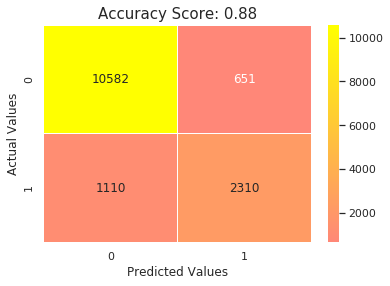

In [35]:
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
ax=sns.heatmap(cm1, annot=True, fmt=".0f", center=0, cmap="spring", linewidths="0.5")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [36]:

Comparison = pd.DataFrame({d_tree1.score(X_test, y_test),
                              lr.score(X_test, y_test),
                       Xgb.score(X_test, y_test),
                       GB.score(X_test, y_test)})

Comparison.index = ['Decission Tree Score','Logistik Regression Score',
                       'XGBoosting Classification Score',
                       'Gradient Boosting Score']

Comparison

,0
Decission Tree Score,0.850611
Logistik Regression Score,0.844537
XGBoosting Classification Score,0.854501
Gradient Boosting Score,0.879820


In [37]:
lastTable = pd.DataFrame({ "Real Salary": y_test[0:10],
                        "Decission Tree Score": d_tree1.predict(X_test)[0:10],
                        "Logistik Regression Score": lr.predict(X_test)[0:10],
                          "Gradient Boosting Score": GB.predict(X_test)[0:10],
                        "XGBoosting Classification Score": Xgb.predict(X_test)[0:10]}); lastTable

,Real Salary,Decission Tree Score,Logistik Regression Score,Gradient Boosting Score,XGBoosting Classification Score
7762,<=50K,<=50K,<=50K,<=50K,<=50K
23881,<=50K,<=50K,<=50K,<=50K,<=50K
30507,>50K,>50K,>50K,>50K,>50K
28911,<=50K,<=50K,<=50K,<=50K,<=50K
19484,<=50K,>50K,<=50K,<=50K,>50K
43031,<=50K,<=50K,<=50K,<=50K,<=50K
28188,<=50K,<=50K,<=50K,<=50K,<=50K
12761,>50K,>50K,>50K,>50K,>50K
40834,<=50K,<=50K,<=50K,<=50K,<=50K
27875,<=50K,<=50K,<=50K,<=50K,<=50K


## <font color=yellow> As you see our accuracy score reached 88% with XGBoost. XGBoost is a decison-tree (decision-tree) based and gradient-boosting Machine Learning system. If your data, unstructured data such as pictures, text or sound will be the right choice for deep learning with artificial neural networks.